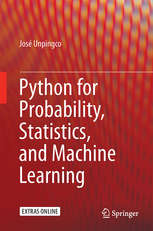

In [1]:
from IPython.display import Image 
Image('../../../python_for_probability_statistics_and_machine_learning.jpg')

[Python for Probability, Statistics, and Machine Learning](https://www.springer.com/fr/book/9783319307152)

In [2]:
from __future__ import division
import numpy as np
np.random.seed(1234)

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The estimation problem starts with the desire to infer something meaningful
from data.  For parametric estimation, the strategy is to postulate a model for
the data and then use the data to fit model parameters.  This leads to two
fundamental questions: where to get the model and how to estimate the
parameters? The first question is best answered by the maxim: *all models are
wrong, some are useful*. In other words, choosing a model depends as much on
the application as on the model itself. Think about models as building
different telescopes to view the sky. No one would ever claim that the
telescope generates the sky! It is same with data models. Models give us
multiple perspectives on the data that themselves are proxies for some deeper
underlying phenomenon.

Some categories of data may be more commonly studied using certain types of
models, but this is usually very domain-specific and ultimately depends on the
aims of the analysis. In some cases, there may be strong physical reasons
behind choosing a model.  For example, one could postulate that the model is
linear with some noise as in the following:

$$
Y = a X + \epsilon
$$

 which basically says that you, as the experimenter, dial in some
value for $X$ and then read off something directly proportional to $X$ as the
measurement, $Y$, plus some additive noise that you attribute to jitter in the
apparatus. Then, the next step is to estimate the paramater $a$ in the model,
given some postulated claim about the nature of $\epsilon$. How to compute the
model parameters depends on the particular methodology. The two broad rubrics
are parametric and non-parametric estimation. In the former, we assume we know
the density function of the data and then try to derive the embedded parameters
for it. In the latter, we claim only to know that the density function is a
member of a broad class of density functions and then use the data
to characterize a member of that class. Broadly speaking, the former consumes
less data than the latter, because there are fewer unknowns to compute from
the data.

Let's concentrate on parametric estimation for now. The tradition is to denote
the unknown parameter to be estimated as $\theta$ which is a member of a large
space of alternates, $\Theta$. To judge between potential $\theta$ values, we
need an objective function, known as a *risk* function,
$L(\theta,\hat{\theta})$, where $\hat{\theta}(\mathbf{x})$ is an
estimate for the unknown $\theta$ that is derived from the available
data $\mathbf{x}$. The most common and useful risk function is the
squared error loss,

$$
L(\theta,\hat{\theta}) = (\theta-\hat{\theta})^2
$$

 Although neat, this is not practical because we need to know the
unknown $\theta$ to compute it. The other problem is because $\hat{\theta}$ is
a function of the observed data, it is also a random variable with its own
probability density function.  This leads to the notion of the *expected risk*
function,

$$
R(\theta,\hat{\theta}) = \mathbb{E}_\theta(L(\theta,\hat{\theta})) = \int L(\theta,\hat{\theta}(\mathbf{x})) f(\mathbf{x};\theta) d \mathbf{x}
$$

 In other words, given a fixed $\theta$, integrate over the
probability density function of the data, $f(\mathbf{x})$,  to compute the
risk. Plugging in for the squared error loss,  we compute the
mean squared error,

$$
\mathbb{E}_\theta(\theta-\hat{\theta})^2 =\int (\theta-\hat{\theta})^2 f(\mathbf{x};\theta) d \mathbf{x}
$$

 This has the important factorization into the *bias*,

$$
\texttt{bias} = \mathbb{E}_\theta(\hat{\theta})-\theta
$$

 with the corresponding variance, $\mathbb{V}_\theta(\hat{\theta})$ as
in the following *mean squared error* (MSE):

$$
\mathbb{E}_\theta(\theta-\hat{\theta})^2= \texttt{bias}^2+\mathbb{V}_\theta(\hat{\theta})
$$

 This is an important trade-off that we will return to repeatedly. The
idea is the bias is nonzero when the estimator $\hat{\theta}$, integrated
over all possible data, $f(\mathbf{x})$, does not equal the underlying target
parameter $\theta$. In some sense, the estimator misses the target, no matter
how much data is used.  When the bias equals zero, the estimated is *unbiased*.
For fixed MSE, low bias implies high variance and vice-versa. This trade-off
was once not emphasized and instead much attention was paid to the smallest
variance of unbiased estimators (see Cramer-Rao bounds). In practice,
understanding and exploiting the trade-off between bias and variance and
reducing the MSE is more important.

With all this set up, we can now ask how bad can bad get by
examining *minimax* risk,

$$
R_{\texttt{mmx}} = \inf_{\hat{\theta}} \sup_\theta R(\theta,\hat{\theta})
$$

 where the $\inf$ is take over all estimators.  Intuitively, this
means if we found the worst possible $\theta$ and swept over all possible
parameter estimators $\hat{\theta}$, and then took the smallest possible risk
we could find, we would have the minimax risk. Thus, an estimator,
$\hat{\theta}_{\texttt{mmx}}$, is a *minimax estimator* if it achieves this
feat,

$$
\sup_\theta R(\theta,\hat{\theta}_{\texttt{mmx}}) =\inf_{\hat{\theta}} \sup_\theta R(\theta,\hat{\theta})
$$

 In other words, even in the face of the worst $\theta$ (i.e., the
$\sup_\theta$), $\hat{\theta}_{\texttt{mmx}}$ still achieves the minimax
risk. There is a greater theory that revolves around minimax estimators of
various kinds, but this is far beyond our scope here. The main thing to focus
on is that under certain technical but easily satisfiable conditions, the
maximum likelihood estimator is approximately minimax. Maximum likelihood is
the subject of the next section.  Let's get started with the simplest
application: coin-flipping.

## Setting up the Coin Flipping Experiment

Suppose we have coin and want to estimate the probability of heads ($p$) for
it. We model the distribution of heads and tails as a Bernoulli distribution
with the following probability mass function:

$$
\phi(x)= p^x (1-p)^{(1-x)}
$$

 where $x$ is the outcome, *1* for heads and *0* for tails. Note that
maximum likelihood is a parametric method that requires the specification of a
particular model for which we will compute embedded parameters. For $n$
independent flips, we have the joint density as the product of $n$ of
these functions as in,

$$
\phi(\mathbf{x})=\prod_{i=1}^n p^x_i (1-p)^{(1-x_i)}
$$

 The following is the *likelihood function*,

$$
\mathcal{L}(p ; \mathbf{x})= \prod_{i=1}^n p^{ x_i }(1-p)^{1-x_i}
$$

 This is basically notation. We have just renamed the
previous equation to emphasize the $p$ parameter, which is what
we want to estimate.

The principle of *maximum likelihood* is to maximize the likelihood as the
function of $p$ after plugging in all of the $x_i$ data. We then call this
maximizer $\hat{p}$ which is a function of the observed $x_i$ data, and as
such, is a random variable with its own distribution. This method therefore
ingests data and an assumed model for the probability density, and produces a
function that estimates the embedded parameter in the assumed probability
density.  Thus, maximum likelihood generates the *functions* of data that we
need in order to get at the underlying parameters of the model. Note that there
is no limit to the ways we can functionally manipulate the data we have
collected. The maximum likelihood principle gives us a systematic method for
constructing these functions subject to the assumed model. This is a point
worth emphasizing: the maximum likelihood principle yields functions as
solutions the same way solving differential equations yields functions as
solutions. It is very, very much harder to produce a function than to produce a
value as a solution, even with the assumption of a convenient probability
density.  Thus, the power of the principle is that you can construct such
functions subject to the model assumptions.

### Simulating the Experiment

We need the following code to simulate coin flipping.

In [4]:
from scipy.stats import bernoulli 
p_true=1/2.0         # estimate this!
fp=bernoulli(p_true) # create bernoulli random variate
xs = fp.rvs(100)     # generate some samples
print xs[:30]        # see first 30 samples

[0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 1]


 Now, we can write out the likelihood function using Sympy.  Note
that we give the Sympy variables the `positive=True` attribute upon
construction because this eases Sympy's internal simplification algorithms.

In [5]:
import sympy
x,p,z=sympy.symbols('x p z', positive=True)
phi=p**x*(1-p)**(1-x) # distribution function
L=np.prod([phi.subs(x,i) for i in xs]) # likelihood function 
print L # approx 0.5?

p**57*(-p + 1)**43


 Note that, once we plug in the data, the likelihood function is
solely a function of the unknown parameter ($p$ in this case).  The following
code uses calculus to find the extrema of the likelihood function.  Note that
taking the `log` of $L$ makes the maximization problem tractable but doesn't
change the extrema.

In [6]:
logL=sympy.expand_log(sympy.log(L))
sol,=sympy.solve(sympy.diff(logL,p),p)
print sol

57/100


**Programming Tip.**

Note that `sol,=sympy.solve` statement includes
a comma after the `sol` variable. This is because the `solve`
function returns a list containing a single element. Using
this assignment unpacks that single element into the `sol` variable
directly. This is another one of the many small elegancies of Python.

 

The following code generates [Figure](#fig:Maximum_likelihood_10_2).

d:\Miniconda64\Lib\site-packages\numpy\__init__.py:1: RuntimeWarning: divide by zero encountered in log
  """


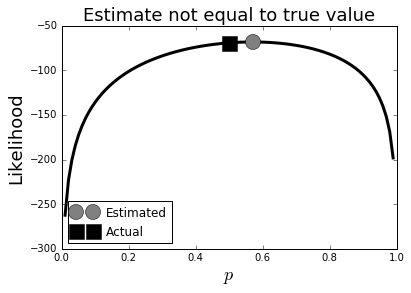

In [7]:

fig,ax=subplots()
x=np.linspace(0,1,100)
ax.plot(x,map(sympy.lambdify(p,logL,'numpy'),x),'k-',lw=3)
ax.plot(sol,logL.subs(p,sol),'o',
        color='gray',ms=15,label='Estimated')
ax.plot(p_true,logL.subs(p,p_true),'s',
        color='k',ms=15,label='Actual')
ax.set_xlabel('$p$',fontsize=18)
ax.set_ylabel('Likelihood',fontsize=18)
ax.set_title('Estimate not equal to true value',fontsize=18)
ax.legend(loc=0)

**Programming Tip.**

In the prior code, we use the `lambdify` function in `lambdify(p,logL,'numpy')` to
take a Sympy expression and convert it into a Numpy version that is easier to
compute.  The `lambdify` function has an extra argument where you can specify
the function space that it should use to convert the expression. In the above
this is set to Numpy.



<!-- dom:FIGURE: [fig-statistics/Maximum_likelihood_10_2.png, width=500 frac=0.75] Maximum likelihood estimate vs. true parameter. Note that the estimate is slightly off from the true value. This is a consequence of the fact that the estimator is a function of the data and lacks knowledge of the true underlying value.  <div id="fig:Maximum_likelihood_10_2"></div> -->
<!-- begin figure -->
<div id="fig:Maximum_likelihood_10_2"></div>

<p>Maximum likelihood estimate vs. true parameter. Note that the estimate is slightly off from the true value. This is a consequence of the fact that the estimator is a function of the data and lacks knowledge of the true underlying value.</p>
<img src="fig-statistics/Maximum_likelihood_10_2.png" width=500>

<!-- end figure -->


[Figure](#fig:Maximum_likelihood_10_2) shows  that our estimator $\hat{p}$
(circle) is not equal to the true value of $p$ (square), despite being
the maximum of the likelihood function. This may sound disturbing, but keep in
mind this estimate is a function of the random data; and since that data can
change, the ultimate estimate can likewise change. I invite you to run this
code in the corresponding IPython notebook a few times to observe this.
Remember that the estimator is a *function* of the data and is thus also a
*random variable*, just like the data is. This means it has its own probability
distribution with corresponding mean and variance. So, what we are observing is
a consequence of that variance.

<!-- !bc pycod -->
<!-- def estimator_gen(niter=10,ns=100): -->
<!-- 'generate data to estimate distribution of maximum likelihood estimator' -->
<!-- out=[] -->
<!-- # make sympy variable real-valued -->
<!-- x=sympy.symbols('x',real=True) -->
<!-- # likelihood function -->
<!-- L= p**x*(1-p)**(1-x) -->
<!-- for i in range(niter): -->
<!-- # generate some samples from the experiment -->
<!-- xs = sample(ns) -->
<!-- # objective function to maximize -->
<!-- J=np.prod([L.subs(x,i) for i in xs]) -->
<!-- # log is easier to work with -->
<!-- logL=sympy.expand_log(sympy.log(J)) -->
<!-- # use basic calculus to find extrema -->
<!-- sol=sympy.solve(sympy.diff(logL,p),p)[0] -->
<!-- # convert output to numeric float from sympy -->
<!-- out.append(float(sol.evalf())) -->
<!-- # return scalar if list contains only 1 term -->
<!-- return out if len(out)>1 else out[0] -->
<!-- !ec -->

<!-- dom:FIGURE: [fig-statistics/Maximum_likelihood_30_2.png, width=500 frac=0.85] Histogram of maximum likelihood estimates. The title shows the estimated mean and standard deviation of the samples. <div id="fig:Maximum_likelihood_30_2"></div>  -->
<!-- begin figure -->
<div id="fig:Maximum_likelihood_30_2"></div>

<p>Histogram of maximum likelihood estimates. The title shows the estimated mean and standard deviation of the samples.</p>
<img src="fig-statistics/Maximum_likelihood_30_2.png" width=500>

<!-- end figure -->


[Figure](#fig:Maximum_likelihood_30_2) shows what happens when you run many
thousands of coin experiments and compute the maximum likelihood
estimate for each experiment, given a particular number of samples 
per experiment. This simulation gives us a histogram of the maximum likelihood
estimates, which is an approximation of the probability distribution of the
$\hat{p}$ estimator itself.  This figure shows that the sample mean
of the estimator ($\mu = \frac{1}{n}\sum \hat{p}_i$) is pretty close to the
true value, but looks can be deceiving. The only way to know for sure is to
check if the estimator is unbiased, namely, if

$$
\mathbb{E}(\hat{p}) = p
$$

 Because this problem is simple, we can solve for this in general
noting that the terms above are either $p$, if $x_i=1$ or $1-p$ if $x_i=0$.
This means that we can write

$$
\mathcal{L}(p\vert \mathbf{x})= p^{\sum_{i=1}^n x_i}(1-p)^{n-\sum_{i=1}^n x_i}
$$

 with corresponding logarithm as

$$
J=\log(\mathcal{L}(p\vert \mathbf{x})) =  \log(p)  \sum_{i=1}^n x_i +   \log(1-p) \left(n-\sum_{i=1}^n x_i\right)
$$

 Taking the derivative of this gives:

$$
\frac{dJ}{dp} = \frac{1}{p}\sum_{i=1}^n x_i + \frac{(n-\sum_{i=1}^n x_i)}{p-1}
$$

 and solving this for $p$ leads to

$$
\hat{p} = \frac{1}{ n} \sum_{i=1}^n x_i
$$

This is our *estimator* for $p$. Up until now, we have been using Sympy to
solve for this based on the data $x_i$ but now that we have it analytically we
don't have to solve for it each time. To check if this estimator is biased, we
compute its expectation:

$$
\mathbb{E}\left(\hat{p}\right) =\frac{1}{n}\sum_i^n \mathbb{E}(x_i) = \frac{1}{n} n \mathbb{E}(x_i)
$$

 by linearity of the expectation and where

$$
\mathbb{E}(x_i)  = p
$$

 Therefore,

$$
\mathbb{E}\left(\hat{p}\right) =p
$$

 This means that the estimator is *unbiased*. Similarly,

$$
\mathbb{E}\left(\hat{p}^2\right) = \frac{1}{n^2} \mathbb{E}\left[\left(  \sum_{i=1}^n x_i \right)^2 \right]
$$

 and where

$$
\mathbb{E}\left(x_i^2\right) =p
$$

 and by the independence assumption,

$$
\mathbb{E}\left(x_i x_j\right) =\mathbb{E}(x_i)\mathbb{E}(x_j) =p^2
$$

 Thus,

$$
\mathbb{E}\left(\hat{p}^2\right) =\left(\frac{1}{n^2}\right) n \left[ p+(n-1)p^2 \right]
$$

 So, the variance of the estimator, $\hat{p}$, is the following:

$$
\mathbb{V}(\hat{p}) = \mathbb{E}\left(\hat{p}^2\right)- \mathbb{E}\left(\hat{p}\right)^2  = \frac{p(1-p)}{n}
$$

 Note that the $n$ in the denominator means that the variance
asymptotically goes to zero as $n$ increases (i.e., we consider more and
more samples). This is good news because it means that more and
more coin flips lead to a better estimate of the underlying $p$.

Unfortunately, this formula for the variance is practically useless because we
need $p$ to compute it and $p$ is the parameter we are trying to estimate in
the first place! However, this is where the *plug-in* principle [^invariance-property] 
saves the day.  It turns out in this situation, you can
simply substitute the maximum likelihood estimator, $\hat{p}$, for the $p$ in
the above equation to obtain the asymptotic variance for $\mathbb{V}(\hat{p})$.
The fact that this works is guaranteed by the asymptotic theory of maximum
likelihood estimators.

[^invariance-property]: This is also known as the *invariance property*
of maximum likelihood estimators. It basically states that the 
maximum likelihood estimator of any function, say, $h(\theta)$, is
the same $h$ with the maximum likelihood estimator for $\theta$ substituted
in for $\theta$; namely, $h(\theta_{ML})$.

Nevertheless, looking at $\mathbb{V}(\hat{p})^2$, we can immediately notice
that if $p=0$, then there is no estimator variance because the outcomes are
guaranteed to be tails. Also, for any $n$,  the maximum of this variance
happens at $p=1/2$. This is our worst case scenario and the only way to
compensate is with larger $n$.

All we have computed is the mean and variance of the estimator. In general,
this is insufficient to characterize the underlying probability density of
$\hat{p}$, except if we somehow knew that $\hat{p}$ were normally distributed.
This is where the powerful *Central Limit Theorem* we discussed in the section ref{ch:stats:sec:limit} comes in. The form of the estimator, which is just a
sample mean, implies that we can apply this theorem and conclude that $\hat{p}$
is asymptotically normally distributed. However, it doesn't quantify how many
samples $n$ we need. In our simulation this is no problem because we can
generate as much data as we like, but in the real world, with a costly
experiment, each sample may be precious [^edgeworth].  

[^edgeworth]: It turns out that the central limit theorem augmented with an
Edgeworth expansion tells us that convergence is regulated by the skewness
of the distribution [[feller1950introduction]](#feller1950introduction). In other words, the 
more symmetric the distribution, the faster it converges to the normal
distribution according to the central limit theorem.

In the following, we won't apply the Central Limit Theorem and instead proceed
analytically.

### Probability Density for the Estimator

To write out the full density for $\hat{p}$, we first have to ask what is
the probability that the estimator will equal a specific value and the tally up
all the ways that could happen with their corresponding probabilities. For
example, what is the probability that

$$
\hat{p} = \frac{1}{n}\sum_{i=1}^n x_i  = 0
$$

  This can only happen one way: when $x_i=0 \hspace{0.5em} \forall i$. The
probability of this happening can be computed from the density

$$
f(\mathbf{x},p)= \prod_{i=1}^n \left(p^{x_i} (1-p)^{1-x_i}  \right)
$$

$$
f\left(\sum_{i=1}^n x_i  = 0,p\right)= \left(1-p\right)^n
$$

 Likewise, if $\lbrace x_i \rbrace$ has only one nonzero element, then

$$
f\left(\sum_{i=1}^n x_i  = 1,p\right)= n p \prod_{i=1}^{n-1} \left(1-p\right)
$$

 where the $n$ comes from the $n$ ways to pick one element
from the $n$ elements $x_i$. Continuing this way, we can construct the
entire density as

$$
f\left(\sum_{i=1}^n x_i  = k,p\right)= \binom{n}{k} p^k  (1-p)^{n-k}
$$

 where the first term on the right is the binomial coefficient of $n$ things
taken $k$ at a time. This is the binomial distribution and it's not the
density for $\hat{p}$, but rather for $n\hat{p}$. We'll leave this as-is
because it's easier to work with below. We just have to remember to keep
track of the $n$ factor.

**Confidence Intervals**

Now that we have the full density for $\hat{p}$, we are ready to ask some
meaningful questions. For example, what is the probability  the estimator is within
$\epsilon$ fraction of the true value of $p$?

$$
\mathbb{P}\left( \vert  \hat{p}-p \vert  \le \epsilon p \right)
$$

 More concretely, we want to know how often the
estimated $\hat{p}$ is trapped within $\epsilon$ of the actual value.  That is,
suppose we ran the experiment 1000 times to generate 1000 different estimates
of $\hat{p}$. What percentage of the 1000 so-computed values are trapped within
$\epsilon$ of the underlying value.  Rewriting the above equation as the
following,

$$
\mathbb{P}\left(p-\epsilon p < \hat{p} < p + \epsilon p \right) = \mathbb{P}\left(  n p - n \epsilon p < \sum_{i=1}^n x_i < n p + n \epsilon p \right)
$$

 Let's plug in some live numbers here for our worst case
scenario (i.e., highest variance scenario) where $p=1/2$. Then, if
$\epsilon = 1/100$, we have

$$
\mathbb{P}\left( \frac{99 n}{100} < \sum_{i=1}^n x_i   < \frac{101 n}{100} \right)
$$

 Since the sum in integer-valued, we need $n> 100$ to even compute this.
Thus, if $n=101$ we have,

$$
\begin{eqnarray*}
\mathbb{P}\left(\frac{9999}{200} < \sum_{i=1}^{101} x_i < \frac{10201}{200} \right) = f\left(\sum_{i=1}^{101} x_i = 50,p\right) &  \ldots \\\
= \binom{101}{50} (1/2)^{50}  (1-1/2)^{101-50} & = & 0.079
\end{eqnarray*}
$$

 This means that in the worst-case scenario for $p=1/2$, given $n=101$
trials, we will only get within 1\% of the actual $p=1/2$ about 8\% of the
time. If you feel disappointed, that only means you've been paying attention.
What if the coin was really heavy and it was hard work to repeat this 101 times?

Let's come at this another way: given I could only flip the coin 100
times, how close could I come to the true underlying value with high
probability (say, 95\%)? In this case, instead of picking a value for
$\epsilon$, we are solving for $\epsilon$. Plugging in gives,

$$
\mathbb{P}\left(50 - 50\epsilon < \sum_{i=1}^{100} x_i < 50 + 50 \epsilon  \right) = 0.95
$$

 which we have to solve for $\epsilon$. Fortunately, all the tools we
need to solve for this are already in Scipy.

In [8]:
from scipy.stats import binom
# n=100, p = 0.5, distribution of the estimator phat
b=binom(100,.5) 
# symmetric sum the probability around the mean
g = lambda i:b.pmf(np.arange(-i,i)+50).sum() 
print g(10) # approx 0.95

0.953955933071


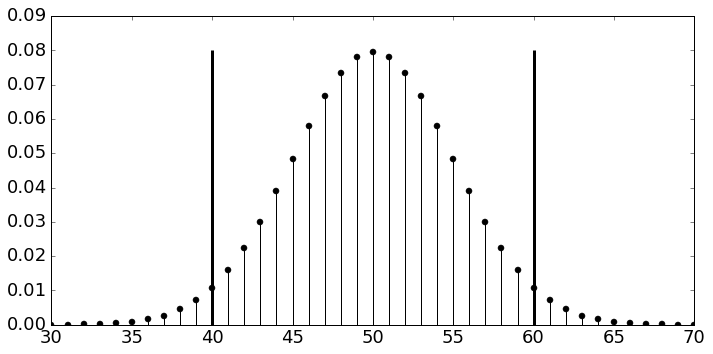

In [9]:
%matplotlib inline

from matplotlib.pylab import subplots, arange
fig,ax= subplots()
fig.set_size_inches((10,5))
# here is the density of the sum of x_i
_=ax.stem(arange(0,101),b.pmf(arange(0,101)),
        linefmt='k-', markerfmt='ko') 
_=ax.vlines( [50+10,50-10],0 ,ax.get_ylim()[1] ,color='k',lw=3.)
_=ax.axis(xmin=30,xmax=70)
_=ax.tick_params(labelsize=18)
#fig.savefig('fig-statistics/Maximum_likelihood_20_2.png')
fig.tight_layout()

<!-- dom:FIGURE: [fig-statistics/Maximum_likelihood_20_2.png, width=500 frac=0.85] Probability mass function for $\hat{p}$. The two vertical lines form the confidence interval. <div id="fig:Maximum_likelihood_20_2"></div> -->
<!-- begin figure -->
<div id="fig:Maximum_likelihood_20_2"></div>

<p>Probability mass function for $\hat{p}$. The two vertical lines form the confidence interval.</p>
<img src="fig-statistics/Maximum_likelihood_20_2.png" width=500>

<!-- end figure -->


 The two vertical lines in the plot show how far out from the mean we
have to go to accumulate 95\% of the probability. Now, we can solve this as

$$
50+50\epsilon=60
$$

 which makes $\epsilon=1/5$ or 20\%. So, flipping 100 times means I can
only get within 20\% of the real $p$ 95\% of the time in the worst case
scenario (i.e., $p=1/2$). The following code verifies the situation.

In [10]:
from scipy.stats import bernoulli 
b=bernoulli(0.5) # coin distribution
xs = b.rvs(100) # flip it 100 times
phat = np.mean(xs) # estimated p
print abs(phat-0.5) < 0.5*0.20 # make it w/in interval?

True


 Let's keep doing this and see if we can get within this interval 95\% of
the time.

In [11]:
out=[]
b=bernoulli(0.5) # coin distribution
for i in range(500):   # number of tries
    xs = b.rvs(100)    # flip it 100 times
    phat = np.mean(xs) # estimated p
    out.append(abs(phat-0.5) < 0.5*0.20 ) # within 20% ?

# percentage of tries w/in 20% interval
print 100*np.mean(out)

97.4


 Well, that seems to work! Now we have a way to get at the quality of
the estimator, $\hat{p}$.

**Maximum Likelihood Estimator Without Calculus**

The prior example showed how we can use calculus to compute the maximum
likelihood estimator. It's important to emphasize that the maximum likelihood
principle does *not* depend on calculus and extends to more general situations
where calculus is impossible. For example, let $X$ be uniformly distributed in
the interval $[0,\theta]$.  Given $n$ measurements of $X$, the likelihood
function is the following:

$$
L(\theta) = \prod_{i=1}^n \frac{1}{\theta} = \frac{1}{\theta^n}
$$

 where each $x_i \in [0,\theta]$. Note that the slope of this function
is not zero anywhere so the usual calculus approach is not going to work here.
Because the likelihood is the product of the individual uniform densities, if
any of the $x_i$ values were outside of the proposed $[0,\theta]$ interval,
then the likelihood would go to zero, because the uniform density is zero
outside of the $[0,\theta]$. Naturally, this is no good for maximization. Thus,
observing that the likelihood function is strictly decreasing with increasing
$\theta$, we conclude that the value for $\theta$ that maximizes the likelihood
is the maximum of the $x_i$ values. To summarize, the maximum likelihood
estimator is the following:

$$
\theta_{ML} = \max_i x_i
$$

 As always, we want the distribution of this estimator to judge its
performance. In this case, this is pretty straightforward. The cumulative
density function for the $\max$ function is the following:

$$
\mathbb{P} \left( \hat{\theta}_{ML} < v \right) =  \mathbb{P}( x_0 \leq v \wedge x_1 \leq v \ldots \wedge x_n \leq v)
$$

 and since all the $x_i$ are uniformly distributed in $[0,\theta]$, we have

$$
\mathbb{P} \left( \hat{\theta}_{ML} < v  \right) =  \left(\frac{v}{\theta}\right)^n
$$

 So, the probability density function is then,

$$
f_{\hat{\theta}_{ML}}(\theta_{ML}) =  n \theta_{ML}^{ n-1 } \theta^{ -n }
$$

 Then, we can compute the $\mathbb{E}(\theta_{ML}) = (\theta n)/(n+1)$ with
corresponding variance as $\mathbb{V}(\theta_{ML}) = (\theta^2 n)/(n+1)^2/(n+2)$.

For a quick sanity check, we can write the following simulation for $\theta =1$
as in the following:

In [12]:
>>> from scipy import stats
>>> rv = stats.uniform(0,1)  # define uniform random variable
>>> mle=rv.rvs((100,500)).max(0) # max along row-dimension
>>> print mean(mle) # approx n/(n+1) = 100/101 ~= 0.99
0.989942138048
>>> print var(mle) #approx n/(n+1)**2/(n+2) ~= 9.61E-5
9.95762009884e-05

0.990250835019
9.41473660278e-05


9.95762009884e-05

**Programming Tip.**

The `max(0)` suffix on for the `mle` computation takes
the maximum of the so-computed array along the column (`axis=0`)
dimension.



 You can also plot `hist(mle)` to see the histogram of the simulated
maximum likelihood estimates and match it up against the probability density
function we derived above.  


In this section, we explored the concept of maximum
likelihood estimation using a coin flipping experiment both analytically and
numerically with the scientific Python stack. We also explored the case when
calculus is not workable for maximum likelihood estimation.  There are two key
points to remember. First, maximum likelihood estimation produces a function of
the data that is itself a random variable, with its own probability
distribution. We can get at the quality of the so-derived estimators by
examining the confidence intervals around the estimated values using the
probability distributions associated with the estimators themselves.  
Second, maximum likelihood estimation applies even in situations 
where using basic calculus is not applicable [[wasserman2004all]](#wasserman2004all).


## Delta Method
<div id="sec:delta_method"></div>

The Central Limit Theorem provides a way to get at the distribution of a random
variable. However, sometimes we are more interested in a function of the random
variable. In order to extend and generalize the central limit theorem in this
way, we need the Taylor series expansion. Recall that the Taylor series
expansion is an approximation of a function of the following form,

$$
T_r(x) =\sum_{i=0}^r \frac{g^{(i)}(a)}{i!}(x-a)^i
$$

 this basically says that a function $g$ can be adequately
approximated about a point $a$ using a polynomial based on its derivatives
evaluated at $a$. Before we state the general theorem, let's examine
an example to understand how the mechanics work.

**Example.**  Suppose that $X$ is a random variable with
$\mathbb{E}(X)=\mu\neq 0$.  Furthermore, supposedly have a suitable
function $g$ and we want the distribution of $g(X)$. Applying the
Taylor series expansion, we obtain the following,

$$
g(X) \approx g(\mu)+ g^{\prime}(\mu)(X-\mu)
$$

 If we use $g(X)$  as an estimator for $g(\mu)$, then we can say that
we approximately have the following

$$
\begin{align*}
\mathbb{E}(g(X)) &=g(\mu) \\\
\mathbb{V}(g(X)) &=(g^{\prime}(\mu))^2 \mathbb{V}(X) \\\
\end{align*}
$$

 Concretely, suppose we want to estimate the odds, $\frac{p}{1-p}$.
For example, if $p=2/3$, then we say that the odds is `2:1` meaning that the
odds of the one outcome are twice as likely as the odds of the other outcome.
Thus, we have $g(p)=\frac{p}{1-p}$ and we want to find
$\mathbb{V}(g(\hat{p}))$.  In our coin-flipping problem, we have the
estimator $\hat{p}=\frac{1}{n}\sum X_k$ from the Bernoulli-distributed data
$X_k$ individual coin-flips. Thus,

$$
\begin{align*}
\mathbb{E}(\hat{p}) &= p  \\\
\mathbb{V}(\hat{p}) &= \frac{p(1-p)}{n}  \\\
\end{align*}
$$

  Now, $g^\prime(p)=1/(1-p)^2$, so we have,

$$
\begin{align*}
\mathbb{V}(g(\hat{p}))&=(g^\prime(p))^2 \mathbb{V}(\hat{p}) \\\
                      &=\left(\frac{1}{(1-p)^2}\right)^2 \frac{p(1-p)}{n}  \\\
                      &= \frac{p}{n(1-p)^3}  \\\
\end{align*}
$$

 which is an approximation of the variance of the estimator
$g(\hat{p})$. Let's simulate this and see how it agrees.

In [13]:
from scipy import stats
# compute MLE estimates 
d=stats.bernoulli(0.1).rvs((10,5000)).mean(0)
# avoid divide-by-zero
d=d[np.logical_not(np.isclose(d,1))]
# compute odds ratio
odds = d/(1-d)
print 'odds ratio=',np.mean(odds),'var=',np.var(odds)

odds ratio= 0.123638095238 var= 0.017607461164


 The first number above is the mean of the simulated odds
ratio and the second is the variance of the estimate.  According to
the variance estimate above, we have $\mathbb{V}(g(1/10))\approx
0.0137$, which is not too bad for this approximation. Recall we want
to estimate the odds from the $\hat{p}$. The code above takes $5000$
estimates of the $\hat{p}$ to estimate $\mathbb{V}(g)$. The odds ratio
for $p=1/10$ is $1/9\approx 0.111$.

**Programming Tip.**

The code above uses the `np.isclose` function to identify the ones from
the simulation and the `np.logical_not` removes these elements from the
data because the odds ratio has a zero in the denominator
for these values.



Let's try this again with a probability of heads of `0.5` instead of
`0.3`.

In [14]:
from scipy import stats
d=stats.bernoulli(.5).rvs((10,5000)).mean(0)
d=d[np.logical_not(np.isclose(d,1))]
print 'odds ratio=',np.mean(d),'var=',np.var(d)

odds ratio= 0.498458458458 var= 0.024323949976


 The odds ratio is this case is equal to one, which
is not close to what was reported. According to our
approximation, we have $\mathbb{V}(g)=0.4$, which does not
look like what our simulation just reported.  This is
because the approximation is best when the odds ratio is
nearly linear and worse otherwise.

<!-- dom:FIGURE: [fig-statistics/Maximum_likelihood_0001.png, width=500 frac=0.85] The odds ratio is close to linear for small values but becomes unbounded as $p$ approaches one. The delta method is more effective for small underlying values of $p$, where the linear approximation is better. <div id="fig:Maximum_likelihood_0001"></div> -->
<!-- begin figure -->
<div id="fig:Maximum_likelihood_0001"></div>

<p>The odds ratio is close to linear for small values but becomes unbounded as $p$ approaches one. The delta method is more effective for small underlying values of $p$, where the linear approximation is better.</p>
<img src="fig-statistics/Maximum_likelihood_0001.png" width=500>

<!-- end figure -->